In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

1a

In [3]:
df = pd.read_stata(r"path")

In [4]:
df.head()

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Transport/Comm/Utility,Operatives,Union,11.739130,48.0,10.33333,5.333333
1,2,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Craftsmen,Union,6.400963,40.0,13.62179,5.250000
2,3,42,Black,Single,Never married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Sales,NaN,5.016723,40.0,17.73077,1.250000
3,4,43,White,Married,Has been married,17.0,College grad,Not south,SMSA,Not central city,Professional services,Other,Union,9.033813,42.0,13.21154,1.750000
4,6,42,White,Married,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Manufacturing,Operatives,Nonunion,8.083731,48.0,17.82051,17.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idcode         2246 non-null   int64  
 1   age            2246 non-null   int64  
 2   race           2246 non-null   object 
 3   married        2246 non-null   object 
 4   never_married  2246 non-null   object 
 5   grade          2244 non-null   float64
 6   collgrad       2246 non-null   object 
 7   south          2246 non-null   object 
 8   smsa           2246 non-null   object 
 9   c_city         2246 non-null   object 
 10  industry       2232 non-null   object 
 11  occupation     2237 non-null   object 
 12  union          1878 non-null   object 
 13  wage           2246 non-null   float64
 14  hours          2242 non-null   float64
 15  ttl_exp        2246 non-null   float64
 16  tenure         2231 non-null   float64
dtypes: float64(5), int64(2), object(10)
memory usage: 29

In [6]:
df.describe()

,idcode,age,grade,wage,hours,ttl_exp,tenure
count,2246.000000,2246.000000,2244.000000,2246.000000,2242.000000,2246.000000,2231.000000
mean,2612.654497,39.153161,13.098930,7.766949,37.218109,12.534977,5.977850
std,1480.863763,3.060002,2.521246,5.755523,10.509135,4.610208,5.510331
min,1.000000,34.000000,0.000000,1.004952,1.000000,0.115385,0.000000
25%,1366.250000,36.000000,12.000000,4.261271,35.000000,9.213141,1.583333
50%,2614.000000,39.000000,12.000000,6.272271,40.000000,13.125005,3.833333
75%,3902.250000,42.000000,15.000000,9.593397,40.000000,15.979167,9.333333
max,5159.000000,46.000000,18.000000,40.746590,80.000000,28.884610,25.916670


In [7]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

grade           2
industry       14
occupation      9
union         368
hours           4
tenure         15
dtype: int64

1b

In [8]:
# df = df.query("grade!=0")
df = df.dropna(subset = ['grade'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2244 entries, 0 to 2245
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idcode         2244 non-null   int64  
 1   age            2244 non-null   int64  
 2   race           2244 non-null   object 
 3   married        2244 non-null   object 
 4   never_married  2244 non-null   object 
 5   grade          2244 non-null   float64
 6   collgrad       2244 non-null   object 
 7   south          2244 non-null   object 
 8   smsa           2244 non-null   object 
 9   c_city         2244 non-null   object 
 10  industry       2230 non-null   object 
 11  occupation     2235 non-null   object 
 12  union          1876 non-null   object 
 13  wage           2244 non-null   float64
 14  hours          2240 non-null   float64
 15  ttl_exp        2244 non-null   float64
 16  tenure         2229 non-null   float64
dtypes: float64(5), int64(2), object(10)
memory usage: 31

In [10]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

industry       14
occupation      9
union         368
hours           4
tenure         15
dtype: int64

1c

In [11]:
df['age'].value_counts()

35    260
36    257
39    234
37    224
41    221
38    219
40    208
43    165
44    163
42    160
45     78
34     53
46      2
Name: age, dtype: int64

1d

In [12]:
df.groupby('age', as_index=False)['wage'].mean()

,age,wage
0,34,6.815027
1,35,8.048292
2,36,8.136586
3,37,7.887929
4,38,8.115071
5,39,7.990340
6,40,7.680887
7,41,7.537489
8,42,7.333253
9,43,7.675594


1e

In [13]:
x = df['age']
y = df['wage']
x = sm.add_constant(x)
model = sm.OLS(y, x)


results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.917
Date:                Sat, 16 Oct 2021   Prob (F-statistic):             0.0878
Time:                        07:41:45   Log-Likelihood:                -7110.3
No. Observations:                2244   AIC:                         1.422e+04
Df Residuals:                    2242   BIC:                         1.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4237      1.559      6.685      0.0

In [14]:
df['lnWage'] = np.log(df['wage']) #standard is natural, for log() = np.log10

In [53]:
df['lnWage'].head()

0    2.462928
1    1.856448
2    1.612777
3    2.200975
4    2.089854
Name: lnWage, dtype: float64

In [16]:
x = df['age']
y = df['lnWage']
x = sm.add_constant(x)

model = sm.OLS(y, x)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 lnWage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.091
Date:                Sat, 16 Oct 2021   Prob (F-statistic):              0.296
Time:                        07:41:48   Log-Likelihood:                -1940.3
No. Observations:                2244   AIC:                             3885.
Df Residuals:                    2242   BIC:                             3896.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0309      0.156     13.043      0.0

as age increases by 1 wage increases by e^-0.0040 # if log dependent variable then can be interpretted as percentage as age increases by 1 wage decreases by 0.4%

In [17]:
mean = df.groupby('age', as_index=False)['lnWage'].mean()

In [18]:
mean = mean.rename(columns={'lnWage':'averagelnWage'})
mean = mean.set_index(['age'])

In [19]:
mean

,averagelnWage
age,
34,1.735862
35,1.890663
36,1.866748
37,1.887804
38,1.902872
39,1.913870
40,1.879741
41,1.875715
42,1.799196


In [20]:
df['avglnWage'] = 0

In [21]:
df['avglnWage'] = df['age'].map(mean['averagelnWage'])

In [54]:
df[['age','avglnWage']].head()

,age,avglnWage
0,37,1.887804
1,37,1.887804
2,42,1.799196
3,43,1.844454
4,42,1.799196


1h

In [23]:
df['lnWage_pred'] = results.predict(x)
df['residualerror'] = df['lnWage'] - df['lnWage_pred']

In [25]:
mean_pred = df.groupby('age', as_index=False)['lnWage_pred'].mean()
print(mean_pred)
print(mean)

    age  lnWage_pred
0    34     1.890144
1    35     1.886003
2    36     1.881863
3    37     1.877722
4    38     1.873582
5    39     1.869441
6    40     1.865301
7    41     1.861160
8    42     1.857020
9    43     1.852879
10   44     1.848739
11   45     1.844599
12   46     1.840458
     averagelnWage
age               
34        1.735862
35        1.890663
36        1.866748
37        1.887804
38        1.902872
39        1.913870
40        1.879741
41        1.875715
42        1.799196
43        1.844454
44        1.799571
45        1.874450
46        2.784718


In [26]:
print(df['lnWage'].mean())
print(df['lnWage_pred'].mean())

1.868806617979988
1.8688066179799891


In [27]:
df['residualerror'].mean()

9.993986228800429e-16

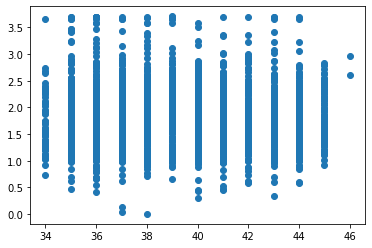

In [28]:
plt.scatter(df['age'], df['lnWage'])

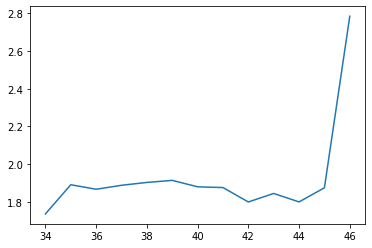

In [29]:
plt.plot(mean.index, mean['averagelnWage']) #age on averagelnwage

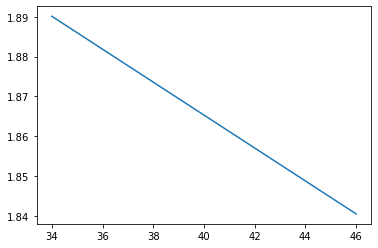

In [30]:
plt.plot(mean_pred['age'],mean_pred['lnWage_pred']) #overlay all three

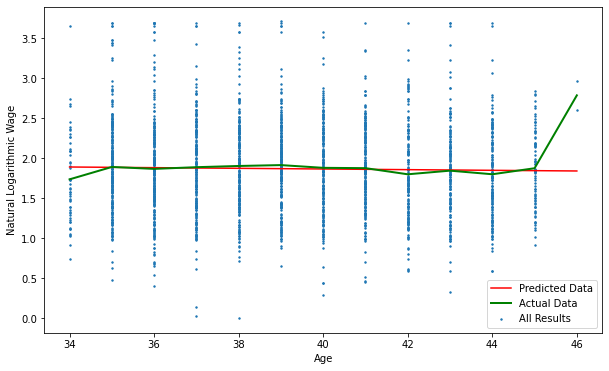

In [51]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(mean_pred['age'],mean_pred['lnWage_pred'], label='Predicted Data',c='red')
ax.plot(mean.index, mean['averagelnWage'], label='Actual Data',c='green',lw=2)
ax.scatter(df['age'], df['lnWage'], label='All Results', s=2)
ax.set_xlabel('Age')
ax.set_ylabel('Natural Logarithmic Wage')
ax.legend()
plt.show()